In [18]:

from requests import Session
import pandas as pd

BASE_URL = "https://api.snowdata.info"

# get data and meta endpoints
with Session() as sesh:
    url = f"{BASE_URL}/dev/getData"
    data_req = sesh.get(url)
    if data_req.ok:
        data = data_req.json()
    url = f"{BASE_URL}/dev/getMeta"
    meta_req = sesh.get(url)
    if meta_req.ok:
        meta = meta_req.json()


In [50]:
df_data = pd.DataFrame.from_records(data[0]["data"][0]["values"], index="date")
df_data.index = pd.to_datetime(df_data.index)
df_data

,value,flag,origValue,origflag,average,median
date,,,,,,
2021-10-01,0.0,V,0.0,S,0.0,0.0
2021-10-02,0.0,V,0.0,S,0.0,0.0
2021-10-03,0.0,V,0.0,S,0.0,0.0
2021-10-04,0.0,V,0.0,S,0.0,0.0
2021-10-05,0.0,V,0.0,S,0.0,0.0
...,...,...,...,...,...,...
2022-07-10,0.0,V,0.0,S,0.0,0.0
2022-07-11,0.0,V,0.0,S,0.0,0.0
2022-07-12,0.0,V,0.0,S,0.0,0.0


In [12]:
df_element_meta = pd.DataFrame.from_records(data[0]["data"][0]["stationElement"], index=[data[0]["stationTriplet"]])
df_element_meta

,beginDate,dataPrecision,durationName,elementCode,endDate,heightDepth,ordinal,originalUnitCode,storedUnitCode
302:OR:SNTL,1980-10-30 15:53,2,DAILY,WTEQ,None,None,1,volt,in


In [27]:
nested_cols = ("forecastPoint", "reservoirMetadata", "stationElements")
non_nested_meta = [{k:v for k, v in site_meta.items() if k not in (nested_cols)} for site_meta in meta]
df_meta = pd.DataFrame.from_records(non_nested_meta, index=["stationTriplet"])
df_meta

,stationId,stateCode,networkCode,name,dcoCode,countyName,huc,elevation,latitude,longitude,dataTimeZone,pedonCode,shefId,beginDate,endDate
stationTriplet,,,,,,,,,,,,,,,
302:OR:SNTL,302,OR,SNTL,ANEROID LAKE #2,OR,Wallowa,170601050101,7400,45.21328,45.21328,-8,None,ANR03,1980-10-01 00:00,None
09180500:UT:USGS,09180500,UT,USGS,Colorado nr Cisco,OR,Wallowa,140300050302,4090,38.81000,-109.30000,-8,None,ANR03,1980-10-01 00:00,None
09379900:AZ:BOR,09379900,AZ,BOR,Lake Powell,OR,Wallowa,140700061008,3700,36.93000,-111.48000,-8,None,ANR03,1980-10-01 00:00,None


In [37]:
forecast_triplet = meta[1]["stationTriplet"]
df_forecast_meta = pd.DataFrame.from_records([meta[1]["forecastPoint"]], index=[forecast_triplet])
df_forecast_meta

,name,forecaster,exceedenceProbabilities
09180500:UT:USGS,"Colorado R. near Cisco, UT",agoodbody,"[10, 30, 50, 70, 90]"


In [35]:
res_triplet = meta[2]["stationTriplet"]
df_reservoir_meta = pd.DataFrame.from_records([meta[2]["reservoirMetadata"]], index=[res_triplet])
df_reservoir_meta

,capacity,elevationAtCapacity,usableCapacity
09379900:AZ:BOR,153000,350,148640


<AxesSubplot:title={'center':'ANEROID LAKE #2'}, xlabel='date'>

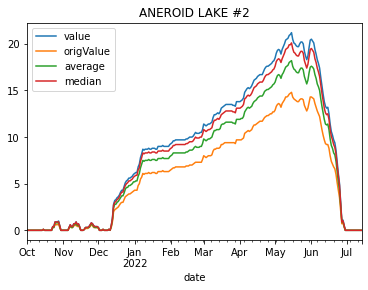

In [51]:
site_name = df_meta[df_meta.index == data[0]["stationTriplet"]]["name"].values[0]
df_data.plot(title=site_name)